# Pythonはどうやって動くのか

## 機械語(Machine Language)
  CPUが行っていることは以下の3点である
  - メモリから命令とデータを取ってくる
  - 命令を解釈し、データを演算機に投げる
  - 演算器から返ってきた結果をメモリに書き戻す
  
  この作業を繰り返してます。  
  機械語は、以上のよう作業を数字の羅列で行うため、その言葉を指します。

  - オペレートコード...「何をするか」を表すコード  
  - オペランド...「データ」を表す部分

## アセンブリ言語(assembly language)
  機械語と一対一対応する人間でもわかる言語を指す。
  アセンブリ言語から機械語へ翻訳する必要がある。この作業を「コンパイル」という
  コンパイラでは以下の作業をなどを行っている
  - 字句解析...文字を認識し、データか作業かを識別する
  - 構文解析...コンピュータが命令を認識すること
  - パーサ...構文解析を行う機械(構文解析器)  
    パーサはプログラムを抽象構文木と呼ばれるデータ構造に変換する
  - リンク...アセンブリを実行ファイルにするための作業。リンクを行うのが「リンカ」というプログラム。

プログラミング言語は大きく2種類ある
  - コンパイル言語(C, JAVA etc...):コンパイラが一括で機械語に変換して実行する言語。
  - スクリプト言語(python, php etc...):逐次的に解釈して実行する言語。そのまま解釈すると遅いため、中間コードを作成する。これを「バイトコード」と言い、高速化を図る

pythonでは、まずプログラムを抽象構文木に変換する。この後、抽象構文木からバイトコードを生成する。バイトコードは仮想的な機械語であり、このバイトコードを実行するプログラム「仮想マシン」がある。エミュレータと呼ばれることもある。

## バイトコードとスタックマシン
  スタック(Stack)...データ構造の一つで、思い荷物を積み上げたようなもの状態。一番上に置いた荷物は上からしか取り出すことができない。
    - プッシュ(push)...新しい荷物を一番上に乗せること
    - ポップ(pop)...一番上から荷物を取り出すこと
  以上のような「最後に入った人が最初に出てくる」状態を「Last In First Out(LIFO)」という。
  逆に「最初に入った人が最初に出てくる」状態を「First In First Out(FIFO)」という


# 課題1-1 : 抽象構文木の可視化

In [1]:
# ライブラリのインポート
import ast
import dis
from graphviz import Digraph

In [6]:
# 抽象構文木をグラフに変換する関数
def visit( node , nodes , pindex , g ):
  name = str(type( node ).__name__)
  index = len(nodes)
  nodes.append(index)
  g.node(str( pindex ), name)
  if index != pindex:
    g.edge(str(pindex), str(index))
  for n in ast.iter_child_nodes(node):
    visit(n, nodes, index, g)

In [7]:
# グラフを可視化する関数
def show_ast(src):
  graph = Digraph()
  tree = ast.parse(src)
  visit(tree, [], 0, graph)
  return graph

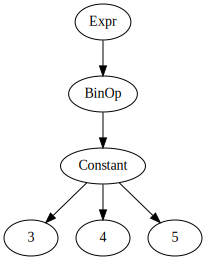

In [9]:
# 抽象構文木の表示
src = """
3+4
"""
show_ast(src)

In [10]:
a, b=(1,2)

In [11]:
def func(a, b):
  return a+b

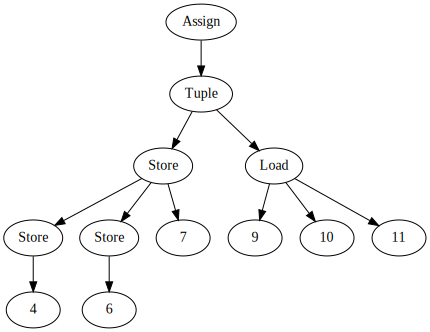

In [13]:
src="""
a, b=(1,2)
"""
show_ast(src)

# 課題1-2 : バイトコード


In [17]:
# バイトコードの取得(逆ポーランド記法が返される)
dis.dis("a+b*c")

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


# 課題2-1 : 逆ポーランド記法電卓
以下のようなプログラムを書く
  - プログラムは、整数、"+"、"-"の3種類のトークンで構成される
  -  プログラムを一つ読み込み、以下の動作をする
    - プログラムが演算子ならスタックから2つのデータをポップして計算し、結果をプッシュする。
    - 整数ならそのままプッシュする
  - プログラム終了時、スタックの一番上にある数字を表示して終了する

In [18]:
# ライブラリのインポート
import dis

In [19]:
# 計算機の実装
def calc(code):
  data = code.split()
  stack = []
  for x in data:
    print(stack, x, end ="=>")
    if x == "+":
      b = stack.pop()
      a = stack.pop()
      stack.append(a+b)
    elif x == "-":
      b = stack.pop()
      a = stack.pop()
      stack.append(a-b)
    else:
      stack.append(int(x))
    print(stack)
  print(stack.pop())

In [21]:
# 計算のテスト
calc("1 2 +")

[] 1=>[1]
[1] 2=>[1, 2]
[1, 2] +=>[3]
3


<解説>
  1. [] 1=>[1]...最初は空スタックで、1がプッシュされて[1]となった
  2. [1] 2=>[1, 2]...2がポップされて[1,2]となった
  3. [1, 2] +=>[3]..."+"が来たのでスタックから数字を取り出し、和の3をプッシュした。
  4. 3...結果を表示

## 課題2-2 : 乗算、除算の実装

In [24]:
# 計算機の実装
def calc2(code):
  data = code.split()
  stack = []
  for x in data:
    print(stack, x, end ="=>")
    if x == "+":
      b = stack.pop()
      a = stack.pop()
      stack.append(a+b)
    elif x == "-":
      b = stack.pop()
      a = stack.pop()
      stack.append(a-b)
    elif x == "*":
      b = stack.pop()
      a = stack.pop()
      stack.append(a*b)
    elif x == "/":
      b = stack.pop()
      a = stack.pop()
      stack.append(int(a/b))
    else:
      stack.append(int(x))
    print(stack)
  print(stack.pop())

In [25]:
# 計算のテスト
calc2("1 2 + 3 * 4 /")

[] 1=>[1]
[1] 2=>[1, 2]
[1, 2] +=>[3]
[3] 3=>[3, 3]
[3, 3] *=>[9]
[9] 4=>[9, 4]
[9, 4] /=>[2]
2


## 発展課題 : 中置記法から逆ポーランド記法への変換

In [26]:
dis.dis("a + b * c")

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE
